This notebook is to allow precision debugging by creating non-random worlds.

In [1]:
import os
os.chdir('..')
from households import *
import pandas
import matplotlib.pyplot as plt

Importing the households package
Importing identity
importing kinship
importing residency
importing behavior
loading narrative
Importing main.py
importing inheritance
importing marriage
importing mobility


In [2]:
from households import *

In this world everyone dies at age 60, gets married at age 20, never gets remarried, and has four children.

In [3]:
age_of_majority = 19
mortality = AgeTable(ages=[0,60,100],sex1 = male, rates1 = [0,1], sex2 = female, rates2 = [0,1])
eligibility = AgeTable(ages = [0,age_of_majority,100], sex1 = female, rates1 = [0,1], sex2 = male, rates2 = [0,1])
remarriage = AgeTable.NullAgeTable()
fertility = AgeTable(ages = [0,age_of_majority,age_of_majority+9,100], sex1 = female, rates1 = [0,1,0], sex2 = male, rates2 = [0,0,0])

In [4]:
inherit_homestead = behavior.inheritance.InheritanceRuleComplex(has_property = behavior.inheritance.has_property_houses,
                                                                    find_heirs = behavior.inheritance.find_heirs_sons_oldest_to_youngest,
                                                                    limit_heirs = behavior.inheritance.limit_heirs_none,
                                                                    distribute_property = behavior.inheritance.distribute_property_to_first_heir_and_move_household,
                                                                    failure = behavior.inheritance.failed_inheritance_no_owner)

marriagerule = behavior.marriage.MarriageRule(eligibility_agetable = eligibility,
                                              get_eligible = behavior.marriage.get_eligible_not_sibling_same_community,
                                              pick_spouse = behavior.marriage.pick_spouse_random,
                                              locality = behavior.marriage.patrilocality,
                                              remarriage_agetable = remarriage)

def dummy(p):
    print(p)
    return behavior.mobility.leave_house_family(p)


disinherited_leave = behavior.mobility.MobilityRule(check_household = behavior.mobility.check_household_overcrowded,
                                                   who_leaves_house = dummy,
                                                   destination = behavior.mobility.destination_random_house_same_village)

#lambda house: behavior.fragmentation.brother_loses_out(house,age=18)

In [5]:
start_pop = 10
start_area = 200
start_age = age_of_majority - 1

rd.seed(1237) #Used here to standardize the example code across runs.
terra = World()
sweetwater = Community(world = terra,
                       name = 'Sweetwater',
                       pop = start_pop,
                       area = start_area,
                       startage = start_age,
                       mortab = mortality,
                       birthtab = fertility,
                       marriagerule = marriagerule,
                       inheritancerule = inherit_homestead,
                       mobilityrule = disinherited_leave)


rd.seed(1237) #important to standardize after setup, just in case

In [6]:
type(terra).__name__

'World'

In [7]:
while terra.year < 25:
    terra.progress()
    
print(terra.year)

25


(array([10.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  4.,  6.,  0.,
         0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

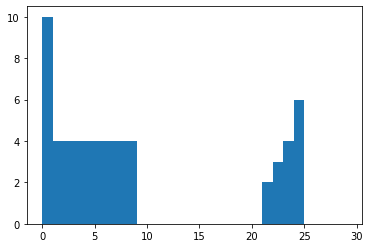

In [17]:
plt.hist([min(d.get_events().keys()) for d in terra.library['Person']], bins = range(30))

In [9]:
p = [p for p in sweetwater.people if str(p) == '<households.main.Person object at 0x00000244063379C8>'][0]
#behavior.mobility.check_household_overcrowded(p)
#behavior.mobility.destination_random_house_same_village(None, [p])
narrative.biography(p)
narrative.census(p.has_house)
for q in kinship.get_parents(p):
    print(narrative.biography(q))
    if q.has_house != None: print(narrative.census(q.has_house))

IndexError: list index out of range

In [ ]:
pp = [p for p in sweetwater.people if p.has_house is None]
pf = kinship.get_family(pp[4])
print([narrative.biography(p) for p in pf[3].has_house.people])
print([narrative.biography(p) for p in pf])
pf[3].has_house.owner in pf[3].has_house.people


In [ ]:
h = [x for x in sweetwater.houses if len(x.people) >2][1] #
print('This house contains ' + narrative.census(h)+':')
for x in h.people:
    print(narrative.biography(x)) 
print(' ')


In [ ]:
#some tests for kinship definitions:
print(kinship.get_parents(h.people[0]) == h.people[0].has_parents)
print(kinship.get_spouse(h.people[0]) == h.people[0].has_spouse)
print(kinship.get_children(h.people[0]) == h.people[0].has_children)
print(kinship.get_parents(h.people[2]) == h.people[2].has_parents)
print(kinship.get_spouse(h.people[2]) == h.people[2].has_spouse)
print(kinship.get_children(h.people[2]) == h.people[2].has_children)
print(kinship.get_siblings(h.people[2]) == h.people[3:])
print(kinship.get_family(h.people[1]) == [h.people[1],h.people[0]]+h.people[2:])

In [ ]:
#some  tests for marriage rules
while sweetwater.year < 20:
    sweetwater.progress()
print('This house contains ' + narrative.census(h)+':')
for x in h.people:
    print(narrative.biography(x)) 
print(' ')

peter = h.people[2]
candidates = marriagerule._MarriageRule__get_eligible(peter)
print(candidates)
print(candidates == [p for p in peter.has_community.people if p.sex == female and p.marriagestatus == unmarried])
print(marriagerule._MarriageRule__get_reciprocal(candidates[0],peter))
print('')
print(peter.marriagestatus.adjective)
print(narrative.biography(peter))


In [ ]:
if peter.marriagestatus == unmarried:
    peter.marriagerule(peter)
    print(peter.marriagestatus.adjective)
    print(peter.has_spouse.name)
    print(narrative.census(peter.has_house))
    print(narrative.biography(peter))
    print(narrative.biography(peter.has_spouse))